In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('emotion.cvs')
df = pd.DataFrame(data)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Usuario\\.cache\\kagglehub\\datasets\\birdy654\\eeg-brainwave-dataset-feeling-emotions\\versions\\1\\emotion.csv'

In [89]:
#Numero de filas y columnas
df.shape

(2132, 2549)

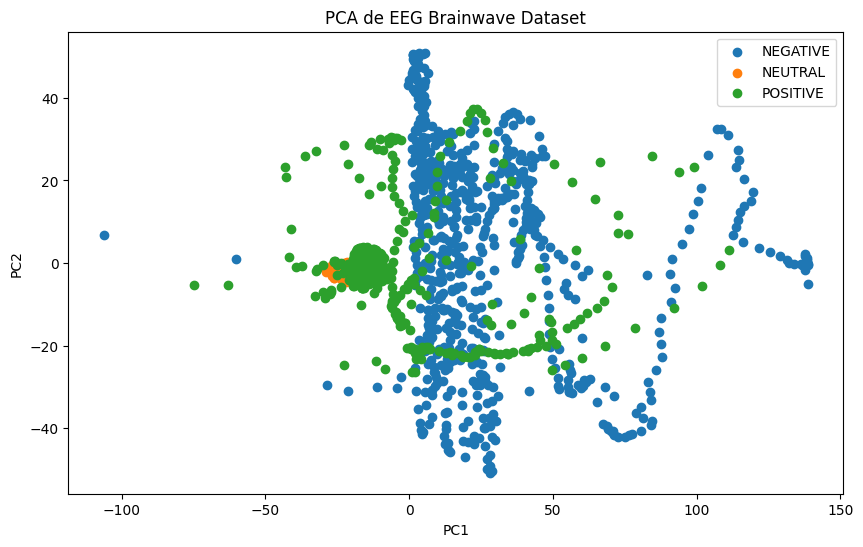

In [90]:
#Distrubucion de los labels
X = df.drop(columns=['label'])
y = df['label']

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Normalizar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convertir a DataFrame y añadir la etiqueta
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y

# Visualizar
plt.figure(figsize=(10, 6))
for label in df_pca['label'].unique():
    subset = df_pca[df_pca['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA de EEG Brainwave Dataset')
plt.legend()
plt.show()


##Informacion Extra

In [91]:
#Crear datasets individuales para cada carateristica del general
columns = df.columns.tolist()

keywords = ['mean_d', 'mean', 'stddev', 'moments', 'max', 'min', 'covmat', 'eigen', 'logm', 'entropy', 'correlate', 'fft']

filtered_dfs = {}

for keyword in keywords:
    filtered_dfs[keyword] = df.loc[:, [col for col in columns if keyword in col]]

mean_d_col = [col for col in columns if 'mean_d' in col]
filtered_dfs['mean'] = filtered_dfs['mean'].drop(mean_d_col, axis=1)

mean_df = filtered_dfs['mean']
mean_d_df = filtered_dfs['mean_d']
stddev_df = filtered_dfs['stddev']
moments_df = filtered_dfs['moments']
max_df = filtered_dfs['max']
min_df = filtered_dfs['min']
covmat_df = filtered_dfs['covmat']
eigen_df = filtered_dfs['eigen']
logm_df = filtered_dfs['logm']
entropy_df = filtered_dfs['entropy']
correlate_df = filtered_dfs['correlate']
fft_df = filtered_dfs['fft']


##Al General_df se le peude sumar cualquera de los anteriores dependiendo de las necesidades 

In [92]:
#Dataset general concatenando los anteriorres necesarios 
General_df = pd.concat([max_df, min_df, fft_df], axis=1)
General_df = General_df.merge(df['label'], left_index=True, right_index=True)
Columns =  np.array(General_df.columns)
Columns

array(['max_0_a', 'max_1_a', 'max_2_a', ..., 'fft_748_b', 'fft_749_b',
       'label'], dtype=object)

In [93]:
entropy = entropy_df.mean(axis=1)
entropy

0       0.996
1       3.488
2       1.494
3       1.001
4       0.995
        ...  
2127    3.486
2128    1.000
2129    0.499
2130    0.992
2131    3.476
Length: 2132, dtype: float64

In [94]:
General_df['entropy'] = entropy
General_df.shape

#Control de columnas
for col in General_df.columns:
    print(col)

max_0_a
max_1_a
max_2_a
max_3_a
max_4_a
max_d_0_a
max_d_1_a
max_d_2_a
max_d_3_a
max_d_4_a
max_q_0_a
max_q_1_a
max_q_2_a
max_q_3_a
max_q_4_a
max_q_5_a
max_q_6_a
max_q_7_a
max_q_8_a
max_q_9_a
max_q_10_a
max_q_11_a
max_q_12_a
max_q_13_a
max_q_14_a
max_q_15_a
max_q_16_a
max_q_17_a
max_q_18_a
max_q_19_a
max_q_20_a
max_q_21_a
max_q_22_a
max_q_23_a
max_q_24_a
max_q_25_a
max_q_26_a
max_q_27_a
max_q_28_a
max_q_29_a
max_q_30_a
max_q_31_a
max_q_32_a
max_q_33_a
max_q_34_a
max_q_35_a
max_q_36_a
max_q_37_a
max_q_38_a
max_q_39_a
max_q_40_a
max_q_41_a
max_q_42_a
max_q_43_a
max_q_44_a
max_q_45_a
max_q_46_a
max_q_47_a
max_q_48_a
max_q_49_a
max_0_b
max_1_b
max_2_b
max_3_b
max_4_b
max_d_0_b
max_d_1_b
max_d_2_b
max_d_3_b
max_d_4_b
max_q_0_b
max_q_1_b
max_q_2_b
max_q_3_b
max_q_4_b
max_q_5_b
max_q_6_b
max_q_7_b
max_q_8_b
max_q_9_b
max_q_10_b
max_q_11_b
max_q_12_b
max_q_13_b
max_q_14_b
max_q_15_b
max_q_16_b
max_q_17_b
max_q_18_b
max_q_19_b
max_q_20_b
max_q_21_b
max_q_22_b
max_q_23_b
max_q_24_b
max_q_25_b
max_

##Ejemplo masculino (ejemplo de uso)

In [95]:
#Dataset con ejemplos de datos del primer sujeto
Needed_columns = ['max_0_a', 'max_1_a', 'max_2_a', 'max_3_a', 'min_0_a', 'min_1_a', 'min_2_a', 'min_3_a', 'fft_0_a', 'fft_1_a', 'fft_2_a', 'fft_3_a', 'entropy']
Sample_df_0 = General_df[Needed_columns]
Sample_df_0

,max_0_a,max_1_a,max_2_a,max_3_a,min_0_a,min_1_a,min_2_a,min_3_a,fft_0_a,fft_1_a,fft_2_a,fft_3_a,entropy
0,61.4,52.0,131.0,93.6,-42.00,9.96,-727.000,-38.00,-520.0,398.00,-201.00,-201.00,0.996
1,45.4,41.6,52.6,42.8,13.60,22.60,-0.705,7.49,66.2,-4.30,43.60,43.60,3.488
2,129.0,38.0,-43.9,127.0,-206.00,14.80,-844.000,-186.00,-90.8,204.00,-77.10,-77.10,1.494
3,52.2,42.2,189.0,42.9,-23.50,25.10,-819.000,-6.21,119.0,6.25,10.90,10.90,1.001
4,126.0,52.6,102.0,121.0,-161.00,18.60,-9.640,-169.00,59.0,-2.37,10.80,10.80,0.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,47.5,40.8,60.4,50.3,15.40,23.30,7.940,11.80,171.0,12.00,-16.10,-16.10,3.486
2128,127.0,41.3,42.9,107.0,-164.00,19.30,-756.000,-154.00,-127.0,261.00,-106.00,-106.00,1.000
2129,57.4,51.8,269.0,94.0,-102.00,-14.50,-681.000,-78.90,-440.0,302.00,-156.00,-156.00,0.499
2130,58.7,40.0,236.0,65.5,-17.20,4.87,-924.000,-40.90,153.0,25.60,6.89,6.89,0.992


<AxesSubplot: >

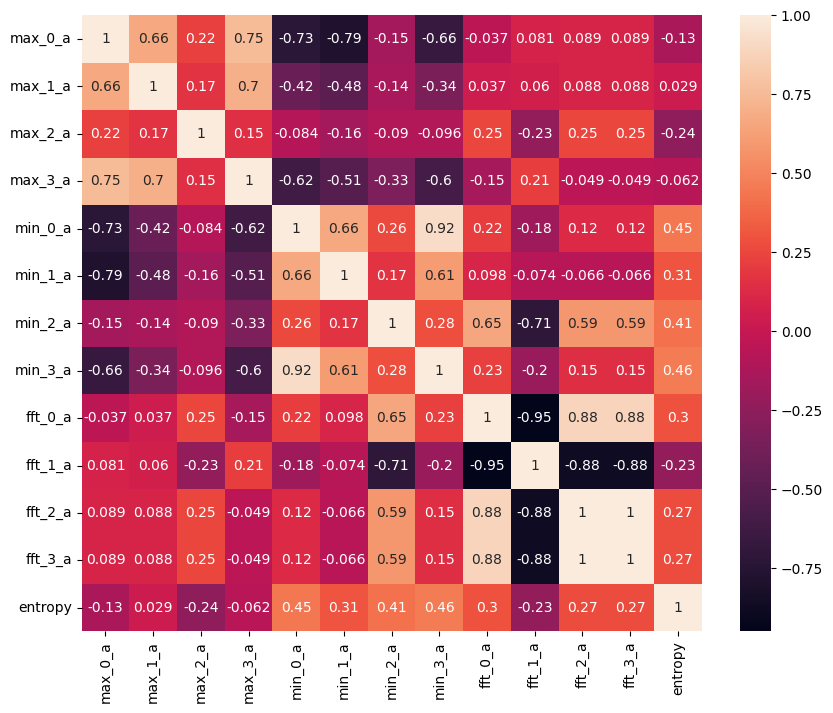

In [96]:
figsize = (10, 8)
plt.figure(figsize=figsize)
sns.heatmap(Sample_df_0.corr(), annot=True)

In [97]:

Sample_df_0['label'] = df['label']
Sample_df_0.reset_index(drop=True)
Sample_df_0

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10296\71115324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sample_df_0['label'] = df['label']


,max_0_a,max_1_a,max_2_a,max_3_a,min_0_a,min_1_a,min_2_a,min_3_a,fft_0_a,fft_1_a,fft_2_a,fft_3_a,entropy,label
0,61.4,52.0,131.0,93.6,-42.00,9.96,-727.000,-38.00,-520.0,398.00,-201.00,-201.00,0.996,NEGATIVE
1,45.4,41.6,52.6,42.8,13.60,22.60,-0.705,7.49,66.2,-4.30,43.60,43.60,3.488,NEUTRAL
2,129.0,38.0,-43.9,127.0,-206.00,14.80,-844.000,-186.00,-90.8,204.00,-77.10,-77.10,1.494,POSITIVE
3,52.2,42.2,189.0,42.9,-23.50,25.10,-819.000,-6.21,119.0,6.25,10.90,10.90,1.001,POSITIVE
4,126.0,52.6,102.0,121.0,-161.00,18.60,-9.640,-169.00,59.0,-2.37,10.80,10.80,0.995,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,47.5,40.8,60.4,50.3,15.40,23.30,7.940,11.80,171.0,12.00,-16.10,-16.10,3.486,NEUTRAL
2128,127.0,41.3,42.9,107.0,-164.00,19.30,-756.000,-154.00,-127.0,261.00,-106.00,-106.00,1.000,POSITIVE
2129,57.4,51.8,269.0,94.0,-102.00,-14.50,-681.000,-78.90,-440.0,302.00,-156.00,-156.00,0.499,NEGATIVE
2130,58.7,40.0,236.0,65.5,-17.20,4.87,-924.000,-40.90,153.0,25.60,6.89,6.89,0.992,NEGATIVE


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10296\3255566620.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='label', y='entropy', data=Sample_df_0, ci=None)


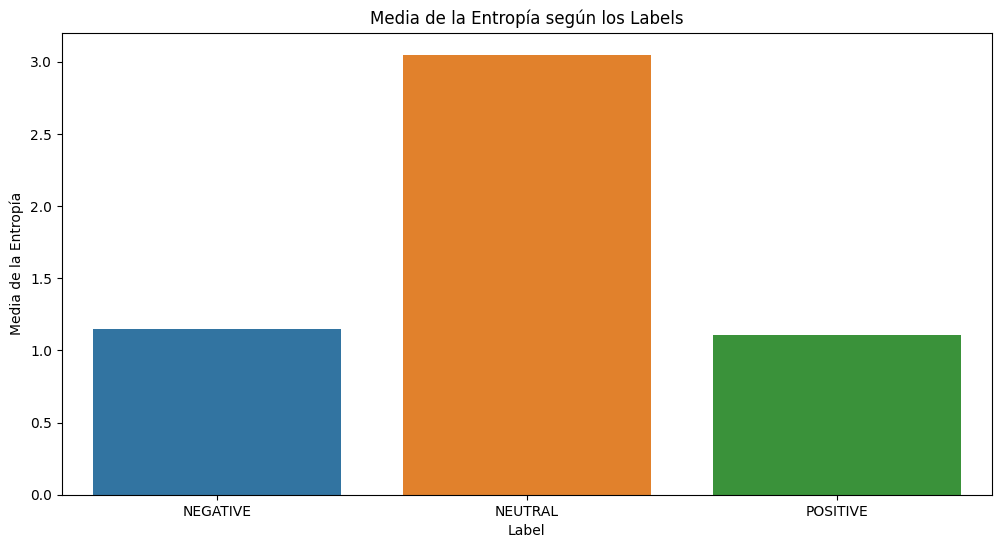

In [98]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='entropy', data=Sample_df_0, ci=None)
plt.title('Media de la Entropía según los Labels')
plt.xlabel('Label')
plt.ylabel('Media de la Entropía')
plt.show()

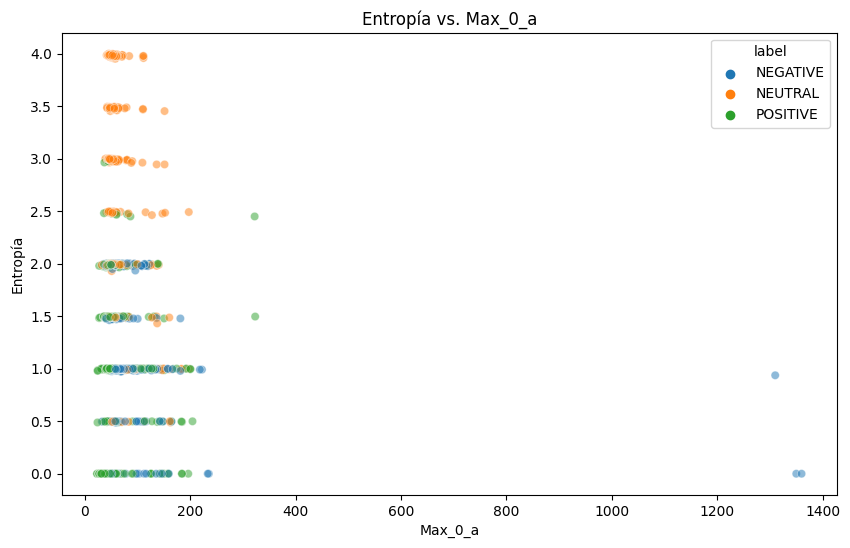

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='max_0_a', y='entropy', hue='label', data=Sample_df_0, alpha = 0.5) # Changed df to Sample_df_0
plt.title('Entropía vs. Max_0_a')
plt.xlabel('Max_0_a')
plt.ylabel('Entropía')
plt.show()

###Ejemplo Femenino (Ejemplo de uso)

In [100]:
Needed_columns2 = ['max_0_b', 'max_1_b', 'max_2_b', 'max_3_b', 'min_0_b', 'min_1_b', 'min_2_b', 'min_3_b', 'fft_0_b', 'fft_1_b', 'fft_2_b', 'fft_3_b', 'entropy']
Sample_df_1 = General_df[Needed_columns2]
Sample_df_1['label'] = df['label']
Sample_df_1

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10296\3976816773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sample_df_1['label'] = df['label']


,max_0_b,max_1_b,max_2_b,max_3_b,min_0_b,min_1_b,min_2_b,min_3_b,fft_0_b,fft_1_b,fft_2_b,fft_3_b,entropy,label
0,68.6,51.8,86.2,86.1,-45.80,13.70,-727.000,-33.00,-508.0,438.00,-222.00,-222.00,0.996,NEGATIVE
1,45.4,41.3,52.9,44.9,7.96,24.30,12.700,12.80,126.0,-4.00,7.42,7.42,3.488,NEUTRAL
2,128.0,38.2,21.1,126.0,-32.00,21.90,-814.000,-4.90,-85.9,361.00,-62.20,-62.20,1.494,POSITIVE
3,48.5,40.6,305.0,41.7,-24.50,23.50,-820.000,-0.61,69.5,3.89,12.10,12.10,1.001,POSITIVE
4,112.0,81.1,259.0,102.0,-84.40,17.50,-36.000,-124.00,226.0,-27.40,147.00,147.00,0.995,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,52.1,38.8,55.4,53.7,11.80,23.30,-0.538,10.20,105.0,3.37,29.20,29.20,3.486,NEUTRAL
2128,46.7,41.2,66.1,33.9,-24.20,19.40,-739.000,-5.97,-23.0,202.00,-81.60,-81.60,1.000,POSITIVE
2129,58.3,52.1,329.0,81.1,-53.80,16.80,-650.000,-43.90,-288.0,312.00,-259.00,-259.00,0.499,NEGATIVE
2130,58.3,40.1,180.0,56.8,-18.60,7.33,-933.000,-44.00,109.0,2.48,49.00,49.00,0.992,NEGATIVE


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10296\36172563.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Sample_df_1.corr(), annot=True)


<AxesSubplot: >

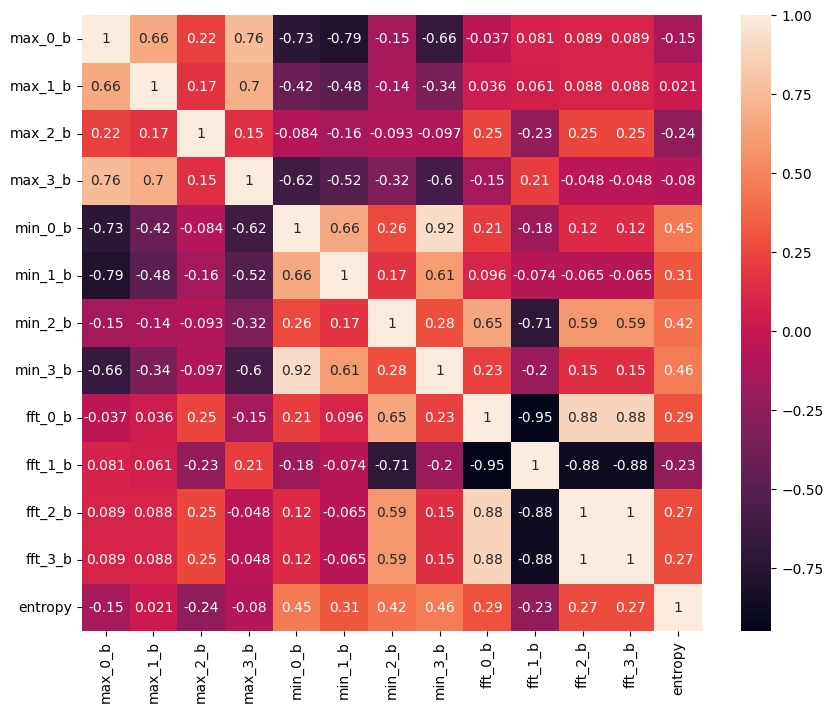

In [101]:
figsize = (10, 8)
plt.figure(figsize=figsize)
sns.heatmap(Sample_df_1.corr(), annot=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10296\20695691.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='label', y='entropy', data=Sample_df_1, ci=None)


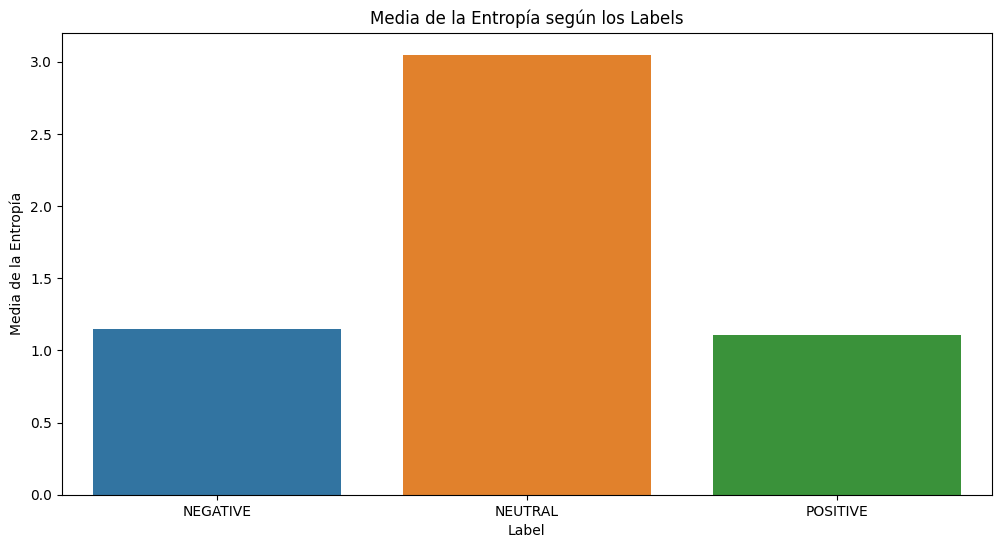

In [102]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='entropy', data=Sample_df_1, ci=None)
plt.title('Media de la Entropía según los Labels')
plt.xlabel('Label')
plt.ylabel('Media de la Entropía')
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_10296\3676824087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sample_df_0['index'] = Sample_df_0.index


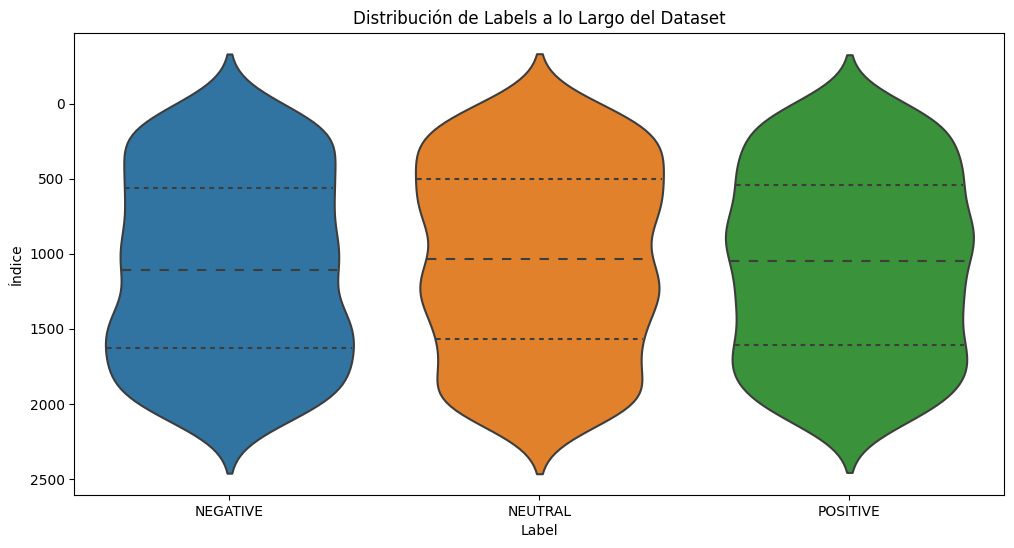

In [ ]:
#grafico de violin para visualizar la distribución de las etiquetas
Sample_df_0['index'] = Sample_df_0.index
plt.figure(figsize=(12, 6))
sns.violinplot(x='label', y='index', data=Sample_df_0, scale='width', inner='quartile')
plt.title('Distribución de Labels a lo Largo del Dataset')
plt.xlabel('Label')
plt.ylabel('Índice')
plt.gca().invert_yaxis()  #invertir el eje y para mostrar el inicio del dataset en la parte superior
plt.show()


#Analisis general

<AxesSubplot: xlabel='label', ylabel='Count'>

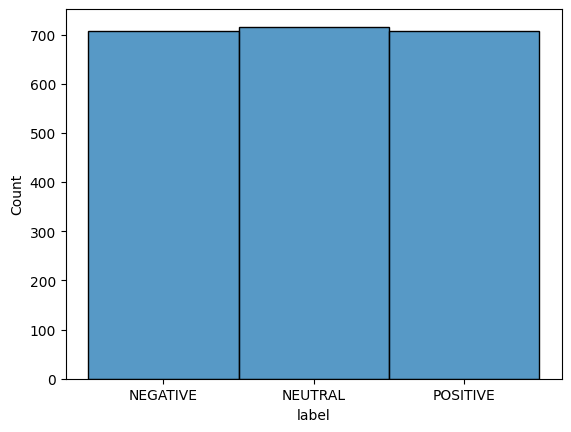

In [105]:
sns.histplot(Sample_df_1["label"])

In [106]:
# Seleccionar algunas características de Fourier para la visualización
columnas_fft = ['fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b', 'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b']

# Filtrar el dataset por cada tipo de emoción
df_negative = df[df['label'] == 'NEGATIVE']
df_neutral = df[df['label'] == 'NEUTRAL']
df_positive = df[df['label'] == 'POSITIVE']


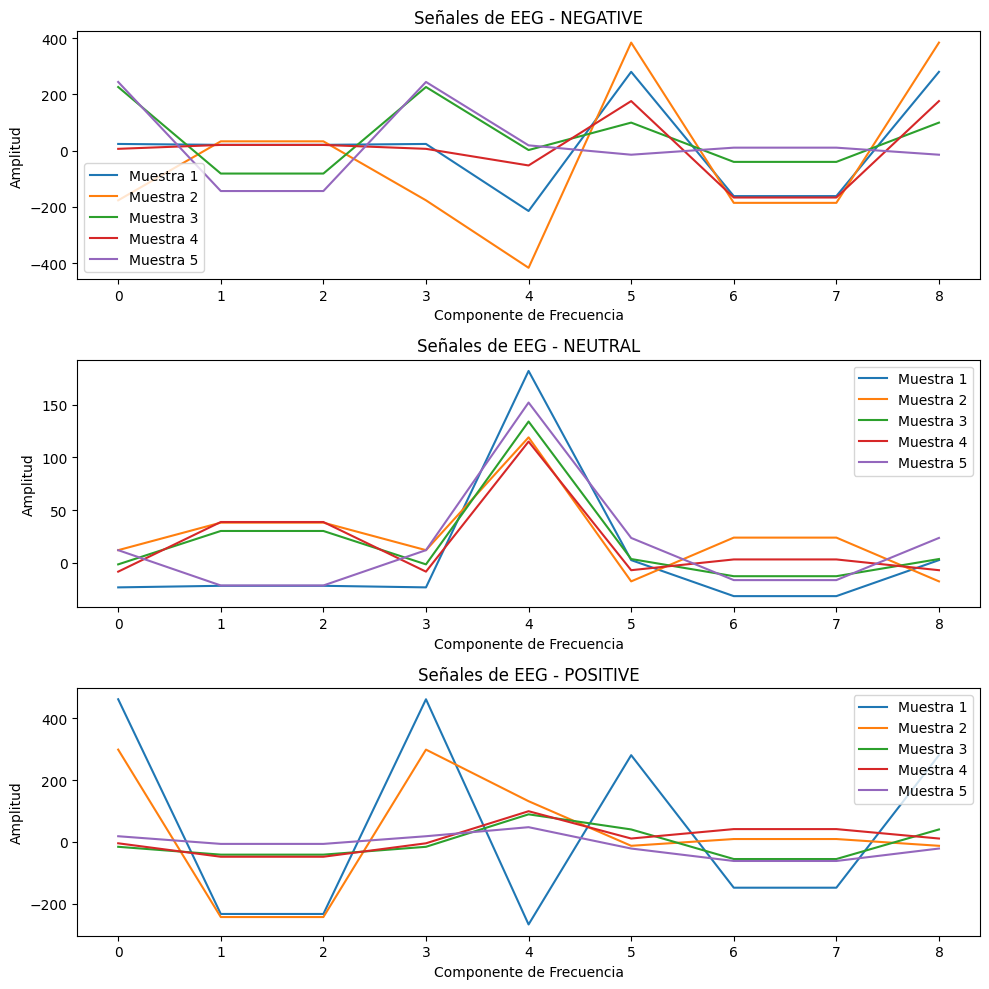

In [107]:
# Función para plotear las señales
def plot_signals(df, label, ax):
    for i in range(min(5, len(df))):  # Mostrar hasta 5 ejemplos por emoción
        signal = df.iloc[i][columnas_fft].values
        ax.plot(signal, label=f'Muestra {i+1}')
    ax.set_title(f'Señales de EEG - {label}')
    ax.set_xlabel('Componente de Frecuencia')
    ax.set_ylabel('Amplitud')
    ax.legend()

# Crear una figura y ejes con tamaño personalizado
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))  # Cambiar el tamaño aquí

# Suponiendo que df_negative, df_neutral y df_positive ya están definidos
# Plotear las señales para cada emoción
plot_signals(df_negative, 'NEGATIVE', axes[0])
plot_signals(df_neutral, 'NEUTRAL', axes[1])
plot_signals(df_positive, 'POSITIVE', axes[2])

plt.tight_layout()
plt.show()


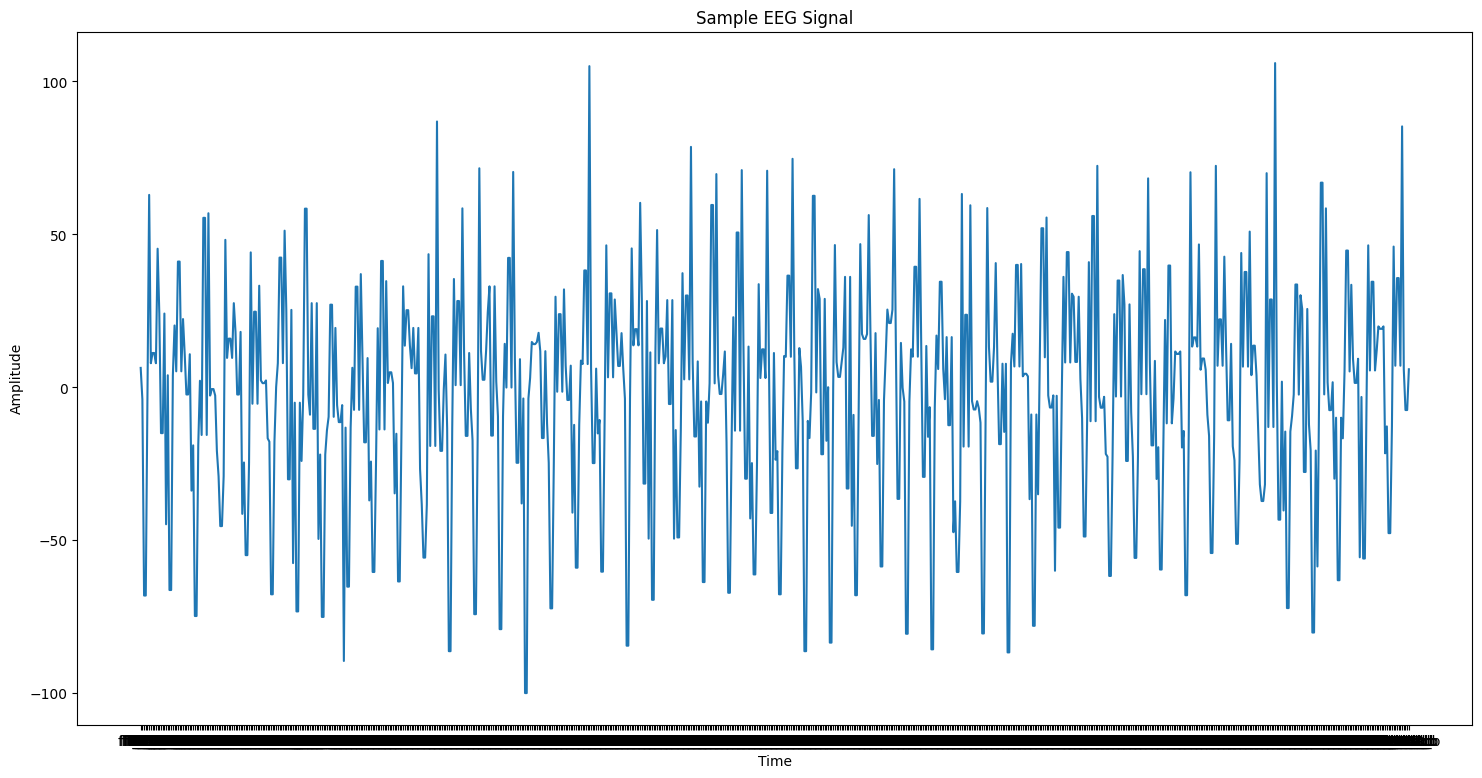

In [108]:
Sample_df = df.loc[713, 'fft_0_b':'fft_749_b']

fig = plt.figure(figsize=(18, 9))
plt.plot(Sample_df)
plt.title('Sample EEG Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [109]:
Sample_df

fft_0_b      6.33
fft_1_b     -3.97
fft_2_b     -68.1
fft_3_b     -68.1
fft_4_b     -3.97
             ... 
fft_745_b    85.3
fft_746_b    5.88
fft_747_b   -7.45
fft_748_b   -7.45
fft_749_b    5.88
Name: 713, Length: 750, dtype: object

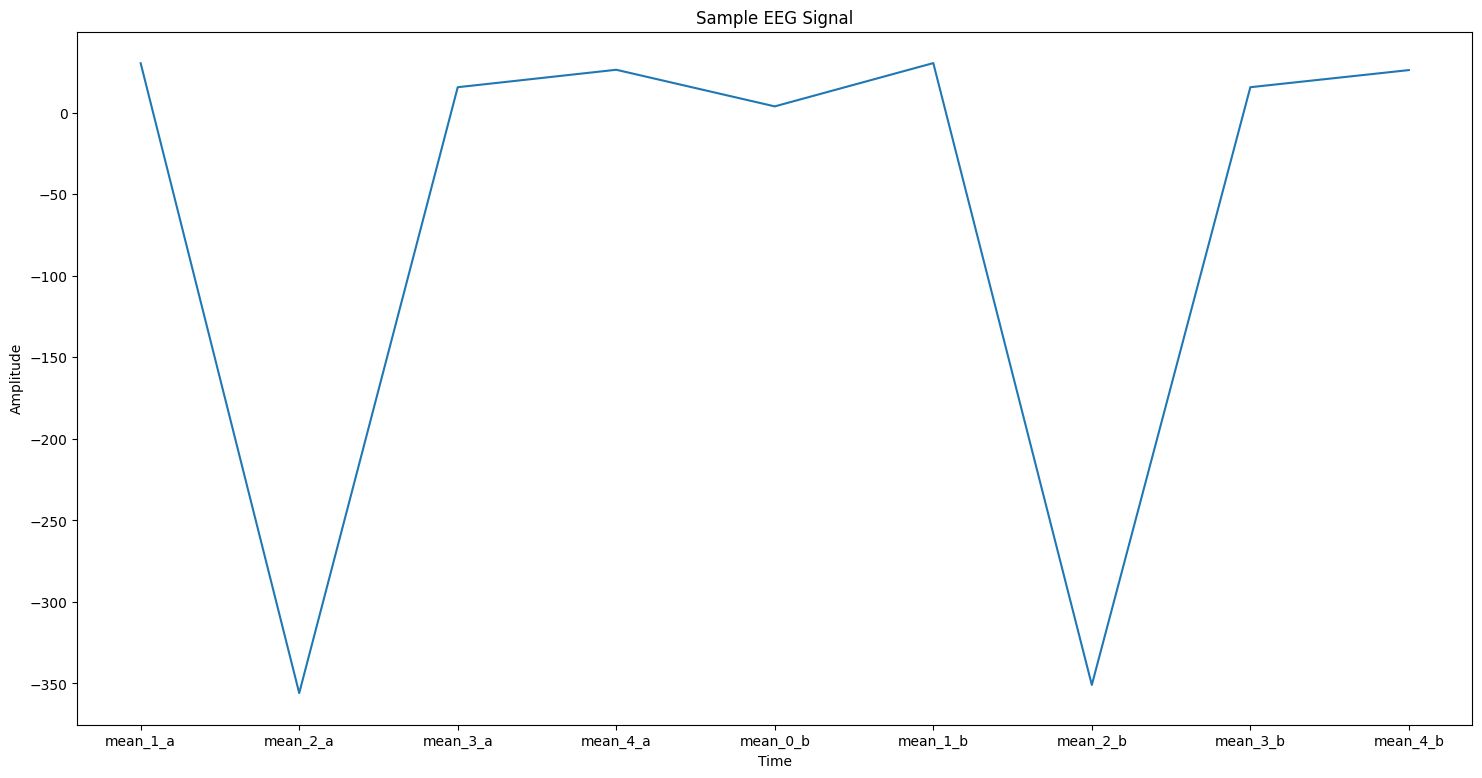

In [110]:
mean_sample = mean_df.loc[0, 'mean_1_a':'mean_4_b']

fig = plt.figure(figsize=(18, 9))
plt.plot(mean_sample)
plt.title('Sample EEG Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


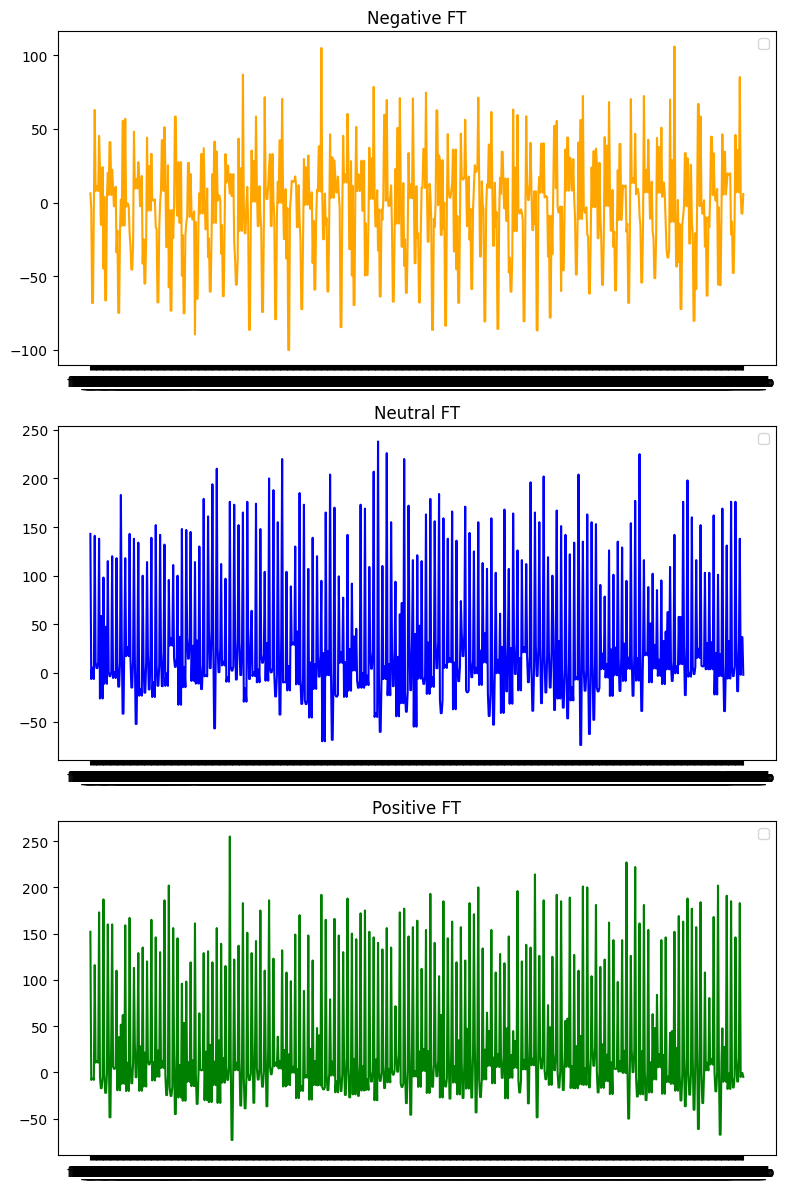

In [111]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Primer subplot
axes[0].plot(df.loc[713, 'fft_0_b':'fft_749_b'[:50]], color = "orange")
axes[0].set_title('Negative FT')
axes[0].legend()

# Segundo subplot
axes[1].plot(df.loc[1463, 'fft_0_b':'fft_749_b'[:50]], color = "blue")
axes[1].set_title('Neutral FT')
axes[1].legend()

# Tercer subplot
axes[2].plot(df.loc[940, 'fft_0_b':'fft_749_b'[:50]], color = "green")
axes[2].set_title('Positive FT')
axes[2].legend()

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

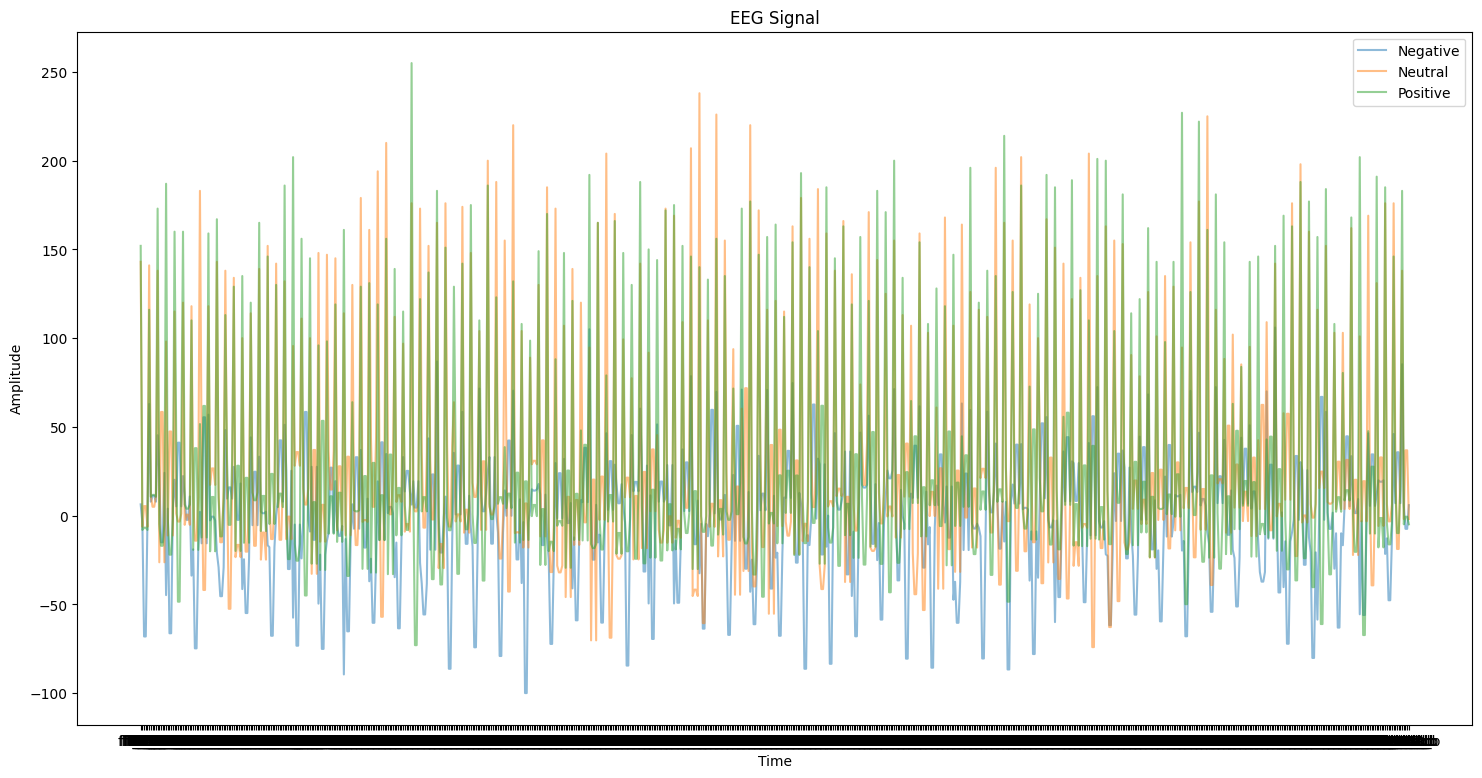

In [ ]:
fig = plt.figure(figsize=(18, 9))
plt.plot(df.loc[713, 'fft_0_b':'fft_749_b'[:50]], label = 'Negative', alpha = 0.5)
plt.plot(df.loc[1463, 'fft_0_b':'fft_749_b'[:50]], label = 'Neutral', alpha = 0.5)
plt.plot(df.loc[940, 'fft_0_b':'fft_749_b'[:50]], label = 'Positive', alpha = 0.5)
plt.title('EEG Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()